In [1]:
import numpy as np
from matplotlib import pyplot as plt
from qiskit import *
#%matplotlib inline

In [2]:
# qr = QuantumRegister(nq)
# cr = ClassicalRegister(nc)
# circuit = QuantumCircuit(qr,qc)

In [3]:
def measure_sx(circuit,qreg,creg):
    circuit.rx(-np.pi/2,qreg)
    circuit.measure(qreg,creg)
    circuit.rx(np.pi/2,qreg)
    return circuit

def measure_sy(circuit,qreg,creg):
    circuit.rz(-np.pi/2,qreg)
    circuit.ry(-np.pi/2,qreg)
    circuit.measure(qreg,creg)
    circuit.ry(np.pi/2,qreg)
    circuit.rz(np.pi/2,qreg)
    return circuit

def measure_sz(circuit,qreg,creg):
    circuit.measure(qreg,creg)
    return circuit

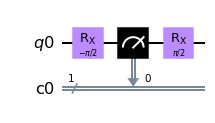

In [4]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

circ = QuantumCircuit(qr,cr)
circ = measure_sx(circ,0,0)
circ.draw()

In [5]:
IBMQ.load_account() 

provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [ ]:
job = execute(circ,backend=BasicAer.get_backend('qasm_simulator'),shots=1024)
counts = job.result().get_counts()

qcomp = provider.get_backend('ibmq_belem')
job = execute(circ,backend=qcomp)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

counts_q = job.result().get_counts()

Job Status: job is queued (6)     

In [ ]:
from qiskit.tools.visualization import plot_histogram
plot_histogram([counts,counts_q],legend=['simulator','device'])

In [ ]:
qr = QuantumRegister(1)
cr = ClassicalRegister(2)

circ = QuantumCircuit(qr,cr)
circ = measure_sx(circ,0,1)
circ = measure_sz(circ,0,0)
circ.draw()

In [ ]:
job = execute(circ,backend=BasicAer.get_backend('qasm_simulator'),shots=1024)
counts = job.result().get_counts()

qcomp = provider.get_backend('ibmq_belem')
job = execute(circ,backend=qcomp)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

counts_q = job.result().get_counts()

In [ ]:
plot_histogram([counts,counts_q],legend=['simulator','device'])